# Data Collection

In [ ]:
!pip install kaggle

import json
import zipfile
import os

In [ ]:
from google.colab import drive 

drive.mount('/content/drive')
os.chdir("/content/drive/Shared drives/UTMSBA APM Pneumonia")

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json

Mounted at /content/drive
kaggle.json


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

chest-xray-pneumonia.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q chest-xray-pneumonia.zip -d .

replace ./chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: test
error:  invalid response [test]
replace ./chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: 
error:  invalid response [{ENTER}]
replace ./chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: all
error:  invalid response [all]
replace ./chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: [A]ll
error:  invalid response [[A]ll]
replace ./chest_xray/__MACOSX/._chest_xray? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

# Data Read

In [ ]:
from google.colab import drive 
import os
import matplotlib.pyplot as plt
import tensorflow as tf
keras = tf.keras
import matplotlib.pyplot as plt
import pathlib
from sklearn.metrics import confusion_matrix,accuracy_score, roc_curve, auc

drive.mount('/content/drive')
os.chdir("/content/drive/Shared drives/UTMSBA APM Pneumonia")

In [ ]:
train_dir = "/content/drive/Shared drives/UTMSBA APM Pneumonia/chest_xray/train"
test_dir = "/content/drive/Shared drives/UTMSBA APM Pneumonia/chest_xray/test"
val_dir = "/content/drive/Shared drives/UTMSBA APM Pneumonia/chest_xray/val"

In [ ]:
batch_size = 32
img_height = 300
img_width = 300
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='categorical',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 5216 files belonging to 2 classes.


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='categorical',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 624 files belonging to 2 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    labels='inferred',
    label_mode='categorical',
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

Found 16 files belonging to 2 classes.


# Modeling

In [1]:
from google.colab import drive
import tensorflow as tf
drive.mount('/content/drive')

train = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/Shareddrives/UTMSBA APM Pneumonia/chest_xray/chest_xray/train/',image_size=(100, 100),batch_size = 128)
test = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/Shareddrives/UTMSBA APM Pneumonia/chest_xray/chest_xray/test/',image_size=(100, 100), batch_size = 128)
val = tf.keras.preprocessing.image_dataset_from_directory('/content/drive/Shareddrives/UTMSBA APM Pneumonia/chest_xray/chest_xray/val/',image_size=(100, 100), batch_size = 128)

Mounted at /content/drive
Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


In [19]:
from tensorflow.keras import datasets, layers, models
import numpy as np

model = models.Sequential([
        layers.experimental.preprocessing.Rescaling(1./255, input_shape = (100,100,3)),
        layers.Conv2D(128, (3, 3), activation='relu', input_shape=(100, 100, 3)),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1,activation = 'sigmoid')
]
)

In [20]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_5 (Rescaling)      (None, 100, 100, 3)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 98, 98, 128)       3584      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 49, 49, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 47, 47, 128)       147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 21, 21, 128)       147584    
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 10, 10, 128)      

In [21]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model_information = model.fit(train,validation_data=test,epochs=5)

Epoch 1/5
41/41 [==============================] - 34s 824ms/step - loss: 0.5890 - accuracy: 0.7429 - val_loss: 0.6811 - val_accuracy: 0.6250
Epoch 2/5
41/41 [==============================] - 34s 820ms/step - loss: 0.3118 - accuracy: 0.8577 - val_loss: 0.7623 - val_accuracy: 0.7292
Epoch 3/5
41/41 [==============================] - 34s 819ms/step - loss: 0.1466 - accuracy: 0.9415 - val_loss: 0.5371 - val_accuracy: 0.8141
Epoch 4/5
41/41 [==============================] - 34s 819ms/step - loss: 0.1251 - accuracy: 0.9525 - val_loss: 0.7144 - val_accuracy: 0.7692
Epoch 5/5
41/41 [==============================] - 35s 842ms/step - loss: 0.1088 - accuracy: 0.9609 - val_loss: 0.6162 - val_accuracy: 0.8157


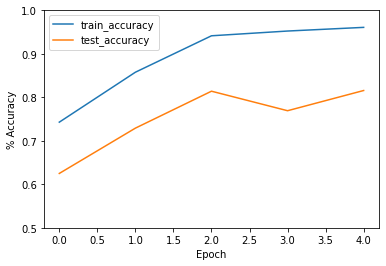

In [22]:
import matplotlib.pyplot as plt

plt.plot(model_information.history['accuracy'], label = 'train_accuracy')
plt.plot(model_information.history['val_accuracy'], label = 'test_accuracy')
plt.xlabel('Epoch')
plt.ylabel('% Accuracy')
plt.ylim([0.5,1])
plt.legend()

In [23]:
val_image_list = []
val_image_labels = []
for i in val.unbatch():
  val_image_list.append(i[0].numpy())
  val_image_labels.append(i[1].numpy())

In [24]:
preds = []
for i in model.predict(np.array(val_image_list)):
  #preds.append(np.argmax(i))
  if i > 0.5:
    preds.append(1)
  else:
    preds.append(0)

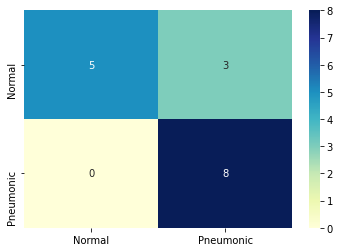

In [25]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

matrix = confusion_matrix(np.array(val_image_labels),np.array(preds))

data = pd.DataFrame(matrix, index=["Normal", "Pneumonic"],columns = ["Normal","Pneumonic"])
sns.heatmap(data, annot = True, cmap = 'YlGnBu', fmt = 'd')

In [26]:
test_image_list = []
test_image_labels = []
for i in test.unbatch():
  test_image_list.append(i[0].numpy())
  test_image_labels.append(i[1].numpy())

In [27]:
preds = []
for i in model.predict(np.array(test_image_list)):
#preds.append(np.argmax(i))
  if i > 0.5:
    preds.append(1)
  else:
    preds.append(0)

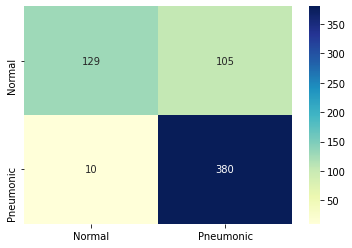

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

matrix = confusion_matrix(np.array(test_image_labels),np.array(preds))

data = pd.DataFrame(matrix, index=["Normal", "Pneumonic"],columns = ["Normal","Pneumonic"])
sns.heatmap(data, annot = True, cmap = 'YlGnBu', fmt = 'd')

# Feature Extraction (which pixel is most important - Ghosh request)


In [29]:
import numpy as np
!pip install shap
import shap

     |████████████████████████████████| 327kB 8.0MB/s 
  Created wheel for shap: filename=shap-0.37.0-cp36-cp36m-linux_x86_64.whl size=463897 sha256=b947efc1741c5d949b00f4ba796300b861f4e3fef3e294ab6be02c374fd4b898
  Stored in directory: /root/.cache/pip/wheels/df/ad/b0/aa7815ec68850d66551ef618095eccb962c8f6022f1d3dd989
Successfully built shap


In [30]:
train_images = []
for i in train.unbatch():
  train_images.append(i[0].numpy())
  
val_images = []
for i in val.unbatch():
  val_images.append(i[0].numpy())

In [41]:
val_images = np.array(val_images)
train_images = np.array(train_images)

# 'background' is used as an input for the "shap" library, 500 can be changed with the risk of using too much RAM
background = train_images[np.random.choice(train_images.shape[0],100,replace = False)]

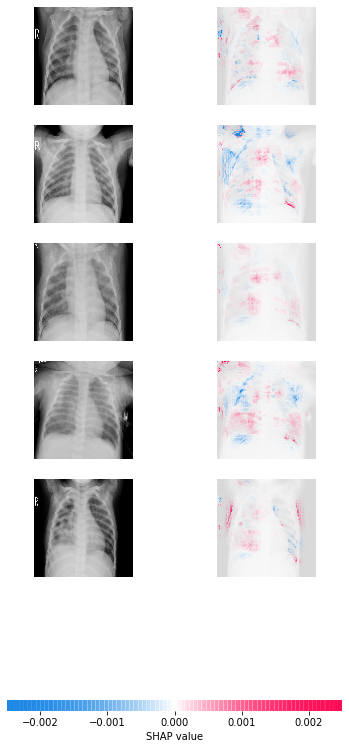

In [42]:
# this line passes the "AddV2" error
shap.explainers._deep.deep_tf.op_handlers["AddV2"] = shap.explainers._deep.deep_tf.passthrough

# print the 5 sample pics (this uses a lot of RAM and crashes Google Colab if you print too many)
# Normal = 0 is the middle plot, Pneumonia = 1 is on the right.  The left plot is the original
e = shap.DeepExplainer(model,background)
shap_values = e.shap_values(val_images[:5])
shap.image_plot(shap_values, val_images[:5])